In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/Housing.csv'  # Update path if necessary
df = pd.read_csv(file_path)

In [4]:
# Load the dataset
df = pd.read_csv("Housing.csv")

# Display the first few rows of the dataset
print(df.head())



      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [5]:
# Data Preprocessing
# Convert categorical columns (yes/no) to binary (1/0)
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']
for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0})



In [6]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())



Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [7]:
# Split data into features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']



In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Check data types and inspect for non-numeric columns
print(X_train.info())
print(X_train.head())

# Encode categorical columns
label_encoder = LabelEncoder()
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

# Check for missing values and handle them
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Ensure y_train is numeric
if y_train.dtype == 'object':
    y_train = label_encoder.fit_transform(y_train)

# Verify the data
print(X_train.info())
print(y_train)

# Fit the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


<class 'pandas.core.frame.DataFrame'>
Index: 436 entries, 46 to 102
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              436 non-null    int64 
 1   bedrooms          436 non-null    int64 
 2   bathrooms         436 non-null    int64 
 3   stories           436 non-null    int64 
 4   mainroad          436 non-null    int64 
 5   guestroom         436 non-null    int64 
 6   basement          436 non-null    int64 
 7   hotwaterheating   436 non-null    int64 
 8   airconditioning   436 non-null    int64 
 9   parking           436 non-null    int64 
 10  prefarea          436 non-null    object
 11  furnishingstatus  436 non-null    object
dtypes: int64(10), object(2)
memory usage: 44.3+ KB
None
     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
46   6000         3          2        4         1          0         0   
93   7200         3          2        1         1 

Linear Regression Performance:
RMSE: 1331071.4167895108
R² Score: 0.6494754192267803
------------------------------
Random Forest Regressor Performance:
RMSE: 1401263.0789821919
R² Score: 0.6115321143409216
------------------------------


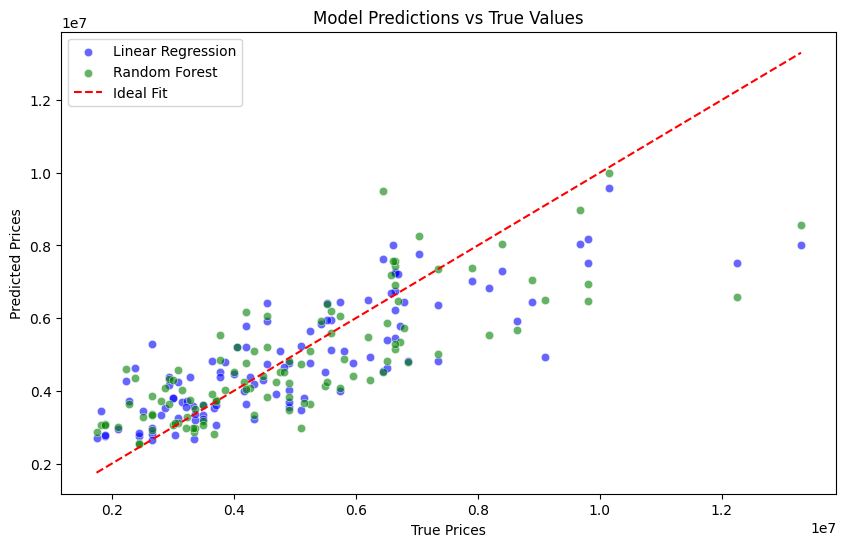

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse}")
    print(f"R² Score: {r2}")
    print("-" * 30)

# Ensure y_test and predictions are arrays
y_test = np.array(y_test)
lr_predictions = np.array(lr_predictions)
rf_predictions = np.array(rf_predictions)

evaluate_model(y_test, lr_predictions, "Linear Regression")
evaluate_model(y_test, rf_predictions, "Random Forest Regressor")

# Visualize Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=lr_predictions, label="Linear Regression", alpha=0.6, color='blue')
sns.scatterplot(x=y_test, y=rf_predictions, label="Random Forest", alpha=0.6, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title("Model Predictions vs True Values")
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.show()
